In [1]:
import torch
import torch.utils.data as data

from data.dataset import *
from models.generator import *
from utils.images import *

In [2]:
my_dataset = CocoLab('data/Coco', size=256, train=False)
my_loader = data.DataLoader(my_dataset, batch_size=4, shuffle=True, num_workers=1)
L, ab = next(iter(my_loader))

In [3]:
ab

tensor([[[[ 6.4189e-02,  6.9510e-02,  7.2655e-02,  ...,  2.2194e-01,
            2.2829e-01,  2.2765e-01],
          [ 6.6186e-02,  8.5837e-02,  1.0541e-01,  ...,  2.4847e-01,
            2.4703e-01,  2.4816e-01],
          [ 7.4122e-02,  1.0403e-01,  1.3058e-01,  ...,  2.5989e-01,
            2.5075e-01,  2.4418e-01],
          ...,
          [ 1.8069e-02,  3.7423e-02,  4.7881e-02,  ...,  1.0987e-01,
            1.1721e-01,  1.2587e-01],
          [ 3.4459e-02,  4.2490e-02,  4.3613e-02,  ...,  1.2241e-01,
            1.2536e-01,  1.2953e-01],
          [ 3.3450e-02,  3.6237e-02,  4.2923e-02,  ...,  1.1871e-01,
            1.2167e-01,  1.2115e-01]],

         [[-1.3978e-01, -1.4361e-01, -1.4302e-01,  ...,  1.2897e-01,
            1.3787e-01,  1.4795e-01],
          [-1.3785e-01, -1.6319e-01, -1.8780e-01,  ...,  1.3928e-01,
            1.4833e-01,  1.4433e-01],
          [-1.4047e-01, -1.8645e-01, -2.2339e-01,  ...,  1.2223e-01,
            1.3125e-01,  1.2171e-01],
          ...,
     

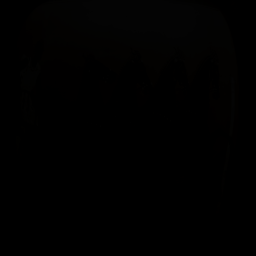

In [4]:
Lab = torch.concat((L, ab), 1)
tensor_to_pil(Lab)[0]

In [5]:
generator = UNet(1, 2)

ab = generator(L).detach()

In [6]:
ab

tensor([[[[ 0.0108, -0.4857, -0.2768,  ..., -0.2136,  0.4940,  0.2554],
          [-0.2979,  0.2700,  0.7372,  ...,  0.4619,  0.4703,  0.0371],
          [-0.3397,  0.6035,  0.3300,  ...,  0.6234, -0.0226,  0.2990],
          ...,
          [-0.2174,  0.8796,  0.8699,  ..., -0.5365,  0.9193, -0.3847],
          [-0.0517,  0.0411,  0.7431,  ...,  0.7006, -0.0636,  0.1439],
          [-0.0191,  0.6410,  0.6459,  ...,  0.3798, -0.0819,  0.1948]],

         [[-0.1029, -0.7895,  0.5093,  ..., -0.3443, -0.0123,  0.0174],
          [-0.4025, -0.0159,  0.6819,  ...,  0.8449,  0.4146, -0.4543],
          [-0.4458, -0.9237,  0.7584,  ..., -0.6706,  0.8048, -0.6308],
          ...,
          [-0.3825, -0.3842, -0.3354,  ..., -0.0865,  0.6674, -0.4198],
          [-0.1451, -0.5996,  0.7561,  ..., -0.4684,  0.8723, -0.8074],
          [ 0.1516, -0.6512,  0.2858,  ..., -0.8593, -0.0499, -0.3059]]],


        [[[-0.0096, -0.4673, -0.0233,  ..., -0.1868, -0.0622,  0.3287],
          [-0.3799,  0.2682,

In [7]:
lab = torch.cat([L, ab], axis=1)

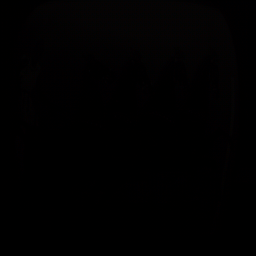

In [8]:
tensor_to_pil(lab)[0]